In [19]:
using StatsKit, Plots, Dates, VegaLite, VegaDatasets, Query; gr(); 


In [20]:
df = CSV.read("../data/2016-2022.csv", DataFrame)

107690×31 DataFrame
    Row │ data_id  iso    event_id_cnty  event_id_no_cnty  event_date       ye ⋯
        │ Int64    Int64  String15       Float64           String31         In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 8912977    356  IND107923              107923.0  18 March 2022     2 ⋯
      2 │ 8912990    356  IND107846              107846.0  18 March 2022     2
      3 │ 8913012    356  IND107941              107941.0  18 March 2022     2
      4 │ 8913089    356  IND107842              107842.0  18 March 2022     2
      5 │ 8913091    356  IND107850              107850.0  18 March 2022     2 ⋯
      6 │ 8913095    356  IND107873              107873.0  18 March 2022     2
      7 │ 8913119    356  IND107754              107754.0  18 March 2022     2
      8 │ 8913123    356  IND107752              107752.0  18 March 2022     2
      9 │ 8913124    356  IND107723              107723.0  18 March 2022     2 ⋯
     10 │ 8913127    356  IND107724              107724.0  18 March 2022     2
     11 │ 8913129    356  IND107722              107722.0  18 March 2022     2
   ⋮    │    ⋮       ⋮          ⋮               ⋮                 ⋮            ⋱
 107681 │ 5488453    356  IND4                        4.0  01 January 2016   2
 107682 │ 5491245    356  IND5                        5.0  01 January 2016   2 ⋯
 107683 │ 5492174    356  IND6                        6.0  01 January 2016   2
 107684 │ 5492810    356  IND7                        7.0  01 January 2016   2
 107685 │ 5493466    356  IND8                        8.0  01 January 2016   2
 107686 │ 5494159    356  IND9                        9.0  01 January 2016   2 ⋯
 107687 │ 5603486    356  IND51303                51303.0  01 January 2016   2
 107688 │ 6072644    356  IND49232                49232.0  01 January 2016   2
 107689 │ 6257234    356  IND10                      10.0  01 January 2016   2
 107690 │ 8543376    356  IND49233                49233.0  01 January 2016   2 ⋯
                                              26 columns and 107669 rows omitted

In [21]:
cities = df.location

107690-element Vector{String31}:
 "Kishanpur"
 "Mumbai - Azad Maidan"
 "Ahmedgarh"
 "Indore"
 "Kanavar"
 "Indore"
 "Hyderabad"
 "Dummugudem"
 "Kothagudem"
 "Khammam"
 "Mulugu"
 "Kallai"
 "Hassan"
 ⋮
 "Sangrur"
 "Ludhiana"
 "Mangaluru"
 "Saifai"
 "Amritsar"
 "Bathinda"
 "Karnal"
 "Ludhiana"
 "Kokrajhar"
 "Pulwama"
 "Narayanpur"
 "Srinagar"

In [22]:
ct        = countmap(cities);
ct_sorted = sort(collect(ct), by=x->x[2], rev=true)

10997-element Vector{Pair{String31, Int64}}:
             "Jammu" => 3347
          "Srinagar" => 2471
 "Delhi - New Delhi" => 2221
        "Chandigarh" => 1729
          "Bathinda" => 1611
          "Ludhiana" => 1609
          "Amritsar" => 1225
            "Imphal" => 1140
          "Dehradun" => 1132
           "Kolkata" => 1123
         "Hyderabad" => 1046
         "Jalandhar" => 912
           "Lucknow" => 905
                     ⋮
        "Chandkheda" => 1
    "Koothattukulam" => 1
           "Panwari" => 1
           "Mashina" => 1
        "Rakhigarhi" => 1
     "Chikkonahalli" => 1
     "Kurubarapalli" => 1
         "Piprahata" => 1
         "Hayatpora" => 1
           "Gajiana" => 1
        "Kamardanga" => 1
             "Gudas" => 1

In [23]:
data_cities   = collect.(ct_sorted[1:4]);

In [24]:
l      = length(cities);
names  = first.(data_cities);
n      = last.(data_cities)./l;
push!(names,"Other");
push!(n, 1-sum(n));

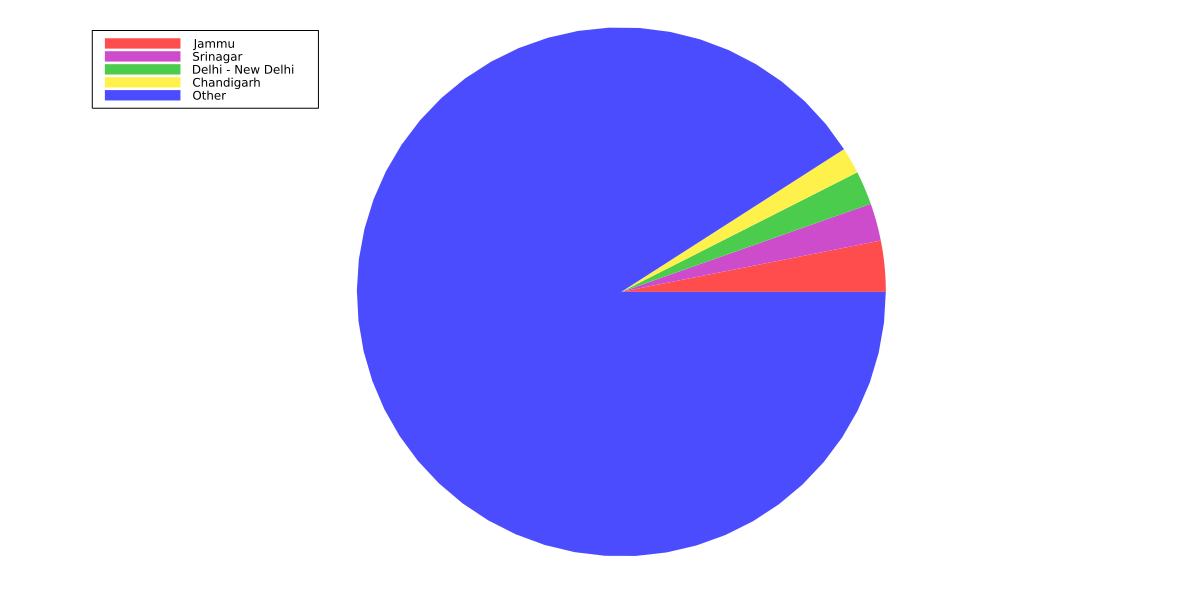

In [25]:
pie(names,n, 
    legend=:topleft,
    size=(1200,600),
    palette=cgrad(:lightrainbow, categorical=true,rev=true),
    linecolor = :white,
    linewidth = 0
)

In [26]:
sources = df.source
sr = countmap(sources);
sr_sorted = sort(collect(sr), by=x->x[2], rev=true);
sr_sorted[1:10]

10-element Vector{Pair{String, Int64}}:
   "Chandigarh Tribune" => 14909
       "Times of India" => 14246
            "The Hindu" => 11258
      "Hindustan Times" => 7451
    "Telegraph (India)" => 3927
      "Daily Excelsior" => 3698
 "United News of India" => 3175
        "Assam Tribune" => 2692
       "Indian Express" => 2632
  "Early Times (India)" => 2558

In [27]:
fatalities = df.fatalities
fatal_count = countmap(fatalities)
fatal_count_sorted = sort(collect(fatal_count), by = x -> x[2], rev = true)
findmax(fatalities)
#Ile bylo najwiecej ofiar? - PYTANIE KIEDY TO BYLO?

(58, 31302)

In [28]:
dates = df.event_date
dates_count = countmap(dates)
dates_count_sorted = sort(collect(dates_count), by = x -> x[2], rev = true)
#W jakie dni bylo najwiecej protestow?

2269-element Vector{Pair{String31, Int64}}:
 "10 September 2018" => 335
 "27 September 2021" => 302
     "02 April 2018" => 281
  "06 February 2021" => 280
   "08 January 2019" => 278
  "08 December 2020" => 271
 "25 September 2020" => 261
     "11 April 2019" => 226
     "26 March 2021" => 197
       "26 May 2021" => 197
   "05 October 2020" => 193
  "15 February 2019" => 176
  "04 February 2019" => 174
                     ⋮
  "31 December 2016" => 10
     "21 March 2020" => 9
   "27 October 2019" => 9
   "29 October 2016" => 9
     "29 March 2020" => 9
   "30 October 2016" => 9
    "27 August 2017" => 8
       "21 May 2021" => 8
     "24 March 2016" => 6
  "04 November 2021" => 5
       "09 May 2021" => 5
       "20 May 2021" => 2

In [29]:
dateformat = Dates.DateFormat("d U y")

dateformat"d U y"

In [30]:
dates = Dates.Date.(dates, dateformat)

107690-element Vector{Date}:
 2022-03-18
 2022-03-18
 2022-03-18
 2022-03-18
 2022-03-18
 2022-03-18
 2022-03-18
 2022-03-18
 2022-03-18
 2022-03-18
 2022-03-18
 2022-03-18
 2022-03-18
 ⋮
 2016-01-01
 2016-01-01
 2016-01-01
 2016-01-01
 2016-01-01
 2016-01-01
 2016-01-01
 2016-01-01
 2016-01-01
 2016-01-01
 2016-01-01
 2016-01-01

In [31]:
months = []
for date in dates
    push!(months, Int(Dates.month(date)))
end
df[!,"month"] = months

107690-element Vector{Any}:
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 3
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [32]:
for month in df.month
    month = Dates.monthname(month)
end

In [33]:
df

107690×32 DataFrame
    Row │ data_id  iso    event_id_cnty  event_id_no_cnty  event_date       ye ⋯
        │ Int64    Int64  String15       Float64           String31         In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 8912977    356  IND107923              107923.0  18 March 2022     2 ⋯
      2 │ 8912990    356  IND107846              107846.0  18 March 2022     2
      3 │ 8913012    356  IND107941              107941.0  18 March 2022     2
      4 │ 8913089    356  IND107842              107842.0  18 March 2022     2
      5 │ 8913091    356  IND107850              107850.0  18 March 2022     2 ⋯
      6 │ 8913095    356  IND107873              107873.0  18 March 2022     2
      7 │ 8913119    356  IND107754              107754.0  18 March 2022     2
      8 │ 8913123    356  IND107752              107752.0  18 March 2022     2
      9 │ 8913124    356  IND107723              107723.0  18 March 2022     2 ⋯
     10 │ 8913127    356  IND107724              107724.0  18 March 2022     2
     11 │ 8913129    356  IND107722              107722.0  18 March 2022     2
   ⋮    │    ⋮       ⋮          ⋮               ⋮                 ⋮            ⋱
 107681 │ 5488453    356  IND4                        4.0  01 January 2016   2
 107682 │ 5491245    356  IND5                        5.0  01 January 2016   2 ⋯
 107683 │ 5492174    356  IND6                        6.0  01 January 2016   2
 107684 │ 5492810    356  IND7                        7.0  01 January 2016   2
 107685 │ 5493466    356  IND8                        8.0  01 January 2016   2
 107686 │ 5494159    356  IND9                        9.0  01 January 2016   2 ⋯
 107687 │ 5603486    356  IND51303                51303.0  01 January 2016   2
 107688 │ 6072644    356  IND49232                49232.0  01 January 2016   2
 107689 │ 6257234    356  IND10                      10.0  01 January 2016   2
 107690 │ 8543376    356  IND49233                49233.0  01 January 2016   2 ⋯
                                              27 columns and 107669 rows omitted

In [34]:
#Podzial na lata

In [35]:
df_2016 = @from i in df begin
    @where i.year == 2016
    @select {i.event_date, i.month, i.event_type, i.sub_event_type, i.location, i.fatalities}
    @collect DataFrame
end
df_2016

13366×6 DataFrame
   Row │ event_date        month  event_type                  sub_event_type   ⋯
       │ String31          Any    String31                    String           ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 31 December 2016  12     Protests                    Peaceful protest ⋯
     2 │ 31 December 2016  12     Violence against civilians  Sexual violence
     3 │ 31 December 2016  12     Riots                       Mob violence
     4 │ 31 December 2016  12     Protests                    Peaceful protest
     5 │ 31 December 2016  12     Riots                       Mob violence     ⋯
     6 │ 31 December 2016  12     Battles                     Armed clash
     7 │ 31 December 2016  12     Protests                    Peaceful protest
     8 │ 31 December 2016  12     Protests                    Peaceful protest
     9 │ 31 December 2016  12     Battles                     Armed clash      ⋯
    10 │ 31 December 2016  12     Protests                    Peaceful protest
    11 │ 30 December 2016  12     Protests                    Peaceful protest
   ⋮   │        ⋮            ⋮                ⋮                      ⋮         ⋱
 13357 │ 01 January 2016   1      Protests                    Peaceful protest
 13358 │ 01 January 2016   1      Riots                       Mob violence     ⋯
 13359 │ 01 January 2016   1      Protests                    Peaceful protest
 13360 │ 01 January 2016   1      Protests                    Peaceful protest
 13361 │ 01 January 2016   1      Protests                    Peaceful protest
 13362 │ 01 January 2016   1      Protests                    Peaceful protest ⋯
 13363 │ 01 January 2016   1      Battles                     Armed clash
 13364 │ 01 January 2016   1      Protests                    Peaceful protest
 13365 │ 01 January 2016   1      Battles                     Armed clash
 13366 │ 01 January 2016   1      Protests                    Peaceful protest ⋯
                                                2 columns and 13345 rows omitted

In [36]:
countmap(df_2016.sub_event_type)

Dict{String, Int64} with 19 entries:
  "Sexual violence"                    => 7
  "Looting/property destruction"       => 65
  "Arrests"                            => 21
  "Armed clash"                        => 694
  "Excessive force against protesters" => 131
  "Peaceful protest"                   => 8714
  "Government regains territory"       => 1
  "Violent demonstration"              => 923
  "Remote explosive/landmine/IED"      => 155
  "Shelling/artillery/missile attack"  => 17
  "Attack"                             => 453
  "Abduction/forced disappearance"     => 29
  "Protest with intervention"          => 883
  "Other"                              => 3
  "Disrupted weapons use"              => 27
  "Agreement"                          => 5
  "Grenade"                            => 59
  "Change to group/activity"           => 1
  "Mob violence"                       => 1178

In [37]:
countmap(df_2016.event_type)

Dict{String31, Int64} with 6 entries:
  "Battles"                    => 695
  "Riots"                      => 2101
  "Strategic developments"     => 122
  "Protests"                   => 9728
  "Violence against civilians" => 489
  "Explosions/Remote violence" => 231

In [16]:
location_2016 = countmap(df_2016.location)
location_2016 = sort(collect(location_2016), by=x->x[2], rev=true)
#location_2016_top = collect.(location_2016[1:10])


2344-element Vector{Pair{String31, Int64}}:
          "Dehradun" => 570
 "Delhi - New Delhi" => 480
          "Bathinda" => 398
          "Srinagar" => 390
             "Jammu" => 301
        "Chandigarh" => 274
          "Ludhiana" => 273
         "Jalandhar" => 233
          "Amritsar" => 204
            "Imphal" => 187
           "Lucknow" => 174
           "Kolkata" => 157
           "Chennai" => 117
                     ⋮
           "Harsola" => 1
        "Topchanchi" => 1
             "Araju" => 1
         "Rangapara" => 1
           "Dhanera" => 1
           "Pengeri" => 1
        "Bangonggre" => 1
           "Ethapur" => 1
      "Ekangarsarai" => 1
             "Nagri" => 1
            "Sangat" => 1
           "Rukhala" => 1

In [17]:
 Dates.monthname(5)

"May"

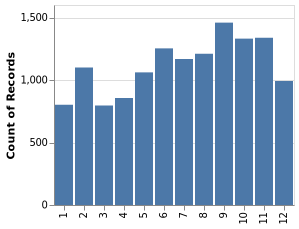

In [18]:
#Ilość protestów w skali roku (słupki to kolejne miesiące)
@vlplot(:bar,  x = df_2016.month, y = "count()")

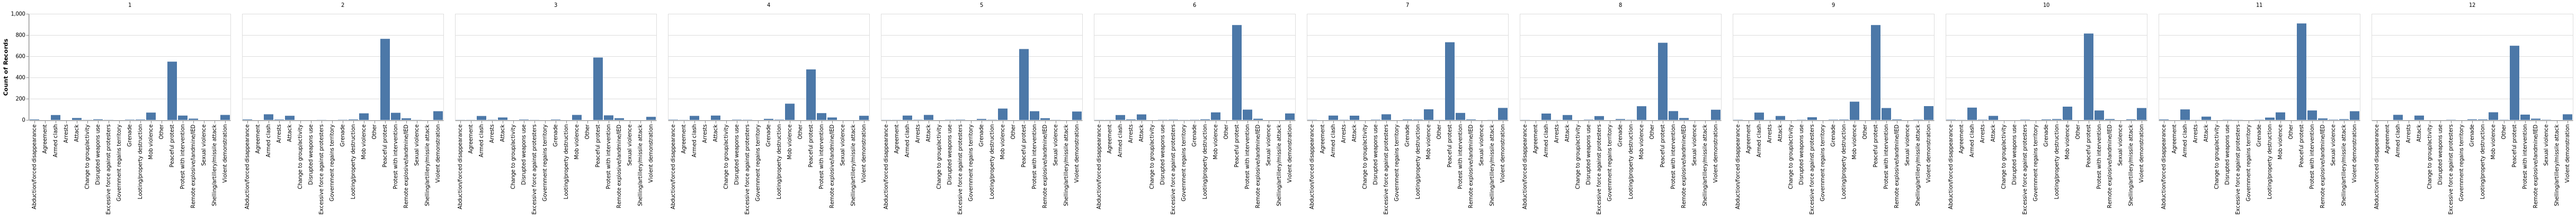

In [19]:
#Podział na rodzaje protestów w miesiącu (12 wykresow = 12 miesięcy)
@vlplot(:bar, column = df_2016.month , x = df_2016.sub_event_type, y = "count()")

In [91]:
df_2016 = @from i in df begin
    @where i.year == 2016
    @where i.location in most_loc_2016_list
    @select {i.event_date, i.month, i.event_type, i.sub_event_type, i.location, i.fatalities}
    @collect DataFrame
end
df_2016

4477×6 DataFrame
  Row │ event_date        month  event_type                  sub_event_type    ⋯
      │ String31          Any    String31                    String            ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 31 December 2016  12     Violence against civilians  Sexual violence   ⋯
    2 │ 31 December 2016  12     Protests                    Peaceful protest
    3 │ 30 December 2016  12     Protests                    Peaceful protest
    4 │ 30 December 2016  12     Protests                    Peaceful protest
    5 │ 30 December 2016  12     Protests                    Peaceful protest  ⋯
    6 │ 30 December 2016  12     Protests                    Peaceful protest
    7 │ 30 December 2016  12     Protests                    Peaceful protest
    8 │ 30 December 2016  12     Protests                    Peaceful protest
    9 │ 30 December 2016  12     Protests                    Peaceful protest  ⋯
   10 │ 30 December 2016  12     Protests                    Peaceful protest
   11 │ 30 December 2016  12     Protests                    Peaceful protest
  ⋮   │        ⋮            ⋮                ⋮                         ⋮       ⋱
 4468 │ 02 January 2016   1      Protests                    Peaceful protest
 4469 │ 02 January 2016   1      Protests                    Peaceful protest  ⋯
 4470 │ 02 January 2016   1      Protests                    Peaceful protest
 4471 │ 02 January 2016   1      Protests                    Peaceful protest
 4472 │ 01 January 2016   1      Protests                    Peaceful protest
 4473 │ 01 January 2016   1      Protests                    Peaceful protest  ⋯
 4474 │ 01 January 2016   1      Protests                    Peaceful protest
 4475 │ 01 January 2016   1      Protests                    Peaceful protest
 4476 │ 01 January 2016   1      Protests                    Peaceful protest
 4477 │ 01 January 2016   1      Protests                    Peaceful protest  ⋯
                                                 3 columns and 4456 rows omitted

In [100]:
most_loc_2016_list=[]
for i in 1:20
    push!(most_loc_2016_list, most_loc_2016[i][1])

end
most_loc_2016_list


20-element Vector{Any}:
 "Dehradun"
 "Delhi - New Delhi"
 "Bathinda"
 "Srinagar"
 "Jammu"
 "Chandigarh"
 "Ludhiana"
 "Jalandhar"
 "Amritsar"
 "Imphal"
 "Lucknow"
 "Kolkata"
 "Chennai"
 "Patna"
 "Patiala"
 "Ranchi"
 "Jaipur"
 "Shimla"
 "Ahmedabad"
 "Bhubaneswar"

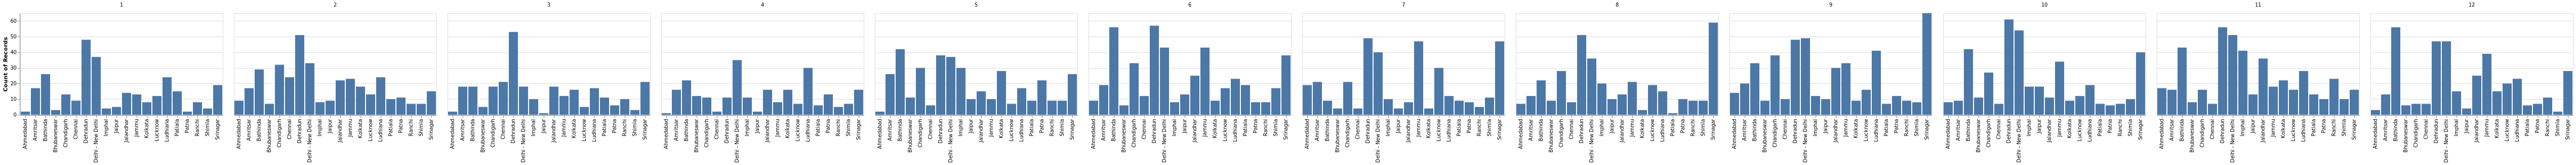

In [94]:
@vlplot(:bar, column = df_2016.month , x = df_2016.location, y = "count()")

In [62]:
df_2017 = @from i in df begin
    @where i.year == 2017
    @select {i.event_date, i.month, i.event_type, i.sub_event_type, i.location, i.fatalities}
    @collect DataFrame
end

13892×6 DataFrame
   Row │ event_date        month  event_type                  sub_event_type   ⋯
       │ String31          Any    String31                    String           ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 31 December 2017  12     Protests                    Peaceful protest ⋯
     2 │ 31 December 2017  12     Protests                    Peaceful protest
     3 │ 31 December 2017  12     Protests                    Peaceful protest
     4 │ 31 December 2017  12     Protests                    Peaceful protest
     5 │ 31 December 2017  12     Protests                    Peaceful protest ⋯
     6 │ 31 December 2017  12     Protests                    Peaceful protest
     7 │ 31 December 2017  12     Protests                    Peaceful protest
     8 │ 31 December 2017  12     Protests                    Peaceful protest
     9 │ 31 December 2017  12     Protests                    Protest with int ⋯
    10 │ 31 December 2017  12     Battles                     Armed clash
    11 │ 31 December 2017  12     Battles                     Armed clash
   ⋮   │        ⋮            ⋮                ⋮                           ⋮    ⋱
 13883 │ 01 January 2017   1      Riots                       Mob violence
 13884 │ 01 January 2017   1      Violence against civilians  Attack           ⋯
 13885 │ 01 January 2017   1      Protests                    Peaceful protest
 13886 │ 01 January 2017   1      Protests                    Protest with int
 13887 │ 01 January 2017   1      Protests                    Peaceful protest
 13888 │ 01 January 2017   1      Protests                    Peaceful protest ⋯
 13889 │ 01 January 2017   1      Violence against civilians  Attack
 13890 │ 01 January 2017   1      Riots                       Violent demonstr
 13891 │ 01 January 2017   1      Protests                    Peaceful protest
 13892 │ 01 January 2017   1      Battles                     Armed clash      ⋯
                                                3 columns and 13871 rows omitted

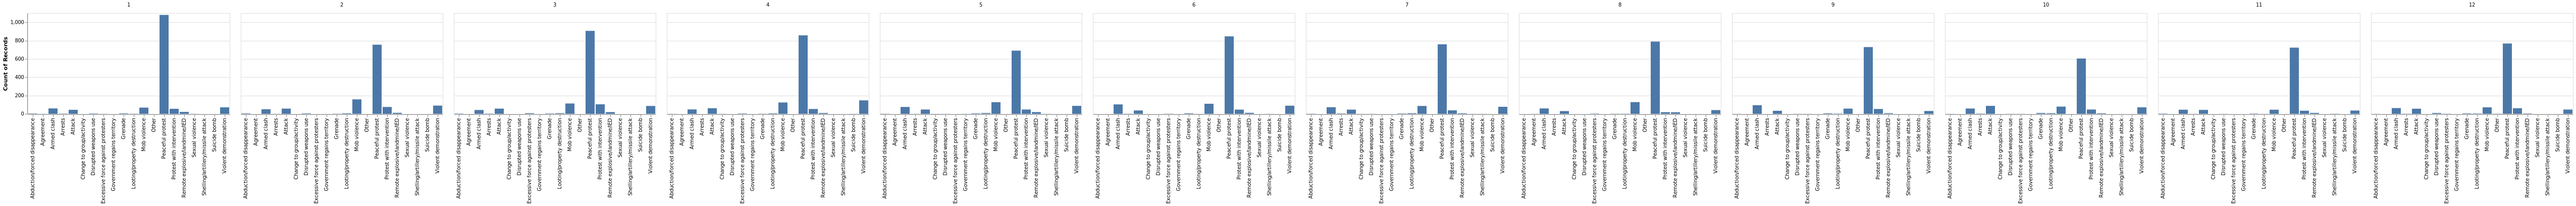

In [26]:
@vlplot(:bar, column = df_2017.month, x = df_2017.sub_event_type, y = "count()")

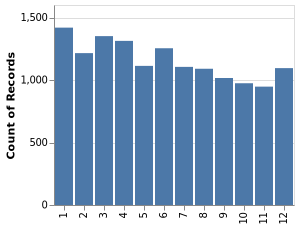

In [63]:
@vlplot(:bar,  x = df_2017.month, y = "count()")

In [64]:
df_2018 = @from i in df begin
    @where i.year == 2018
    @select {i.event_date, i.month, i.event_type, i.sub_event_type, i.location, i.fatalities}
    @collect DataFrame
end

18374×6 DataFrame
   Row │ event_date        month  event_type                  sub_event_type   ⋯
       │ String31          Any    String31                    String           ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 31 December 2018  12     Protests                    Peaceful protest ⋯
     2 │ 31 December 2018  12     Protests                    Peaceful protest
     3 │ 31 December 2018  12     Protests                    Peaceful protest
     4 │ 31 December 2018  12     Protests                    Peaceful protest
     5 │ 31 December 2018  12     Protests                    Peaceful protest ⋯
     6 │ 31 December 2018  12     Protests                    Peaceful protest
     7 │ 31 December 2018  12     Protests                    Peaceful protest
     8 │ 31 December 2018  12     Violence against civilians  Attack
     9 │ 31 December 2018  12     Protests                    Peaceful protest ⋯
    10 │ 31 December 2018  12     Protests                    Peaceful protest
    11 │ 31 December 2018  12     Violence against civilians  Attack
   ⋮   │        ⋮            ⋮                ⋮                           ⋮    ⋱
 18365 │ 01 January 2018   1      Protests                    Peaceful protest
 18366 │ 01 January 2018   1      Protests                    Protest with int ⋯
 18367 │ 01 January 2018   1      Violence against civilians  Attack
 18368 │ 01 January 2018   1      Protests                    Peaceful protest
 18369 │ 01 January 2018   1      Protests                    Peaceful protest
 18370 │ 01 January 2018   1      Strategic developments      Disrupted weapon ⋯
 18371 │ 01 January 2018   1      Protests                    Peaceful protest
 18372 │ 01 January 2018   1      Protests                    Protest with int
 18373 │ 01 January 2018   1      Protests                    Peaceful protest
 18374 │ 01 January 2018   1      Battles                     Armed clash      ⋯
                                                3 columns and 18353 rows omitted

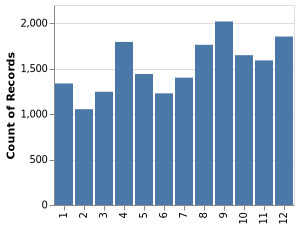

In [65]:
@vlplot(:bar,  x = df_2018.month, y = "count()")

In [66]:
df_2019 = @from i in df begin
    @where i.year == 2019
    @select {i.event_date, i.month, i.event_type, i.sub_event_type, i.location, i.fatalities}
    @collect DataFrame
end

23932×6 DataFrame
   Row │ event_date        month  event_type  sub_event_type             locat ⋯
       │ String31          Any    String31    String                     Strin ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 31 December 2019  12     Protests    Peaceful protest           Manda ⋯
     2 │ 31 December 2019  12     Protests    Peaceful protest           Mahob
     3 │ 31 December 2019  12     Protests    Peaceful protest           Luckn
     4 │ 31 December 2019  12     Protests    Peaceful protest           Silch
     5 │ 31 December 2019  12     Protests    Peaceful protest           Ludhi ⋯
     6 │ 31 December 2019  12     Protests    Peaceful protest           Farid
     7 │ 31 December 2019  12     Protests    Peaceful protest           Jalan
     8 │ 31 December 2019  12     Protests    Peaceful protest           Morin
     9 │ 31 December 2019  12     Protests    Peaceful protest           Jalan ⋯
    10 │ 31 December 2019  12     Protests    Peaceful protest           Bhopa
    11 │ 31 December 2019  12     Protests    Peaceful protest           Thoot
   ⋮   │        ⋮            ⋮        ⋮                   ⋮                    ⋱
 23923 │ 01 January 2019   1      Battles     Armed clash                Khari
 23924 │ 01 January 2019   1      Protests    Peaceful protest           Khari ⋯
 23925 │ 01 January 2019   1      Protests    Peaceful protest           Chhan
 23926 │ 01 January 2019   1      Protests    Peaceful protest           Krale
 23927 │ 01 January 2019   1      Protests    Peaceful protest           Gund
 23928 │ 01 January 2019   1      Protests    Peaceful protest           Chert ⋯
 23929 │ 01 January 2019   1      Battles     Armed clash                Gulpu
 23930 │ 01 January 2019   1      Protests    Peaceful protest           Zabga
 23931 │ 01 January 2019   1      Protests    Peaceful protest           Ramha
 23932 │ 01 January 2019   1      Protests    Peaceful protest           Harin ⋯
                                                2 columns and 23911 rows omitted

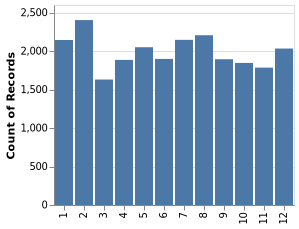

In [67]:
@vlplot(:bar,  x = df_2019.month, y = "count()")

In [68]:
df_2020 = @from i in df begin
    @where i.year == 2020
    @select {i.event_date,i.month, i.event_type, i.sub_event_type, i.location, i.fatalities}
    @collect DataFrame
end

18035×6 DataFrame
   Row │ event_date        month  event_type                  sub_event_type   ⋯
       │ String31          Any    String31                    String           ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 31 December 2020  12     Protests                    Peaceful protest ⋯
     2 │ 31 December 2020  12     Protests                    Peaceful protest
     3 │ 31 December 2020  12     Protests                    Peaceful protest
     4 │ 31 December 2020  12     Battles                     Armed clash
     5 │ 31 December 2020  12     Violence against civilians  Attack           ⋯
     6 │ 31 December 2020  12     Protests                    Peaceful protest
     7 │ 31 December 2020  12     Protests                    Peaceful protest
     8 │ 31 December 2020  12     Riots                       Violent demonstr
     9 │ 31 December 2020  12     Protests                    Peaceful protest ⋯
    10 │ 31 December 2020  12     Protests                    Peaceful protest
    11 │ 31 December 2020  12     Riots                       Violent demonstr
   ⋮   │        ⋮            ⋮                ⋮                         ⋮      ⋱
 18026 │ 01 January 2020   1      Battles                     Armed clash
 18027 │ 01 January 2020   1      Battles                     Armed clash      ⋯
 18028 │ 01 January 2020   1      Battles                     Armed clash
 18029 │ 01 January 2020   1      Battles                     Armed clash
 18030 │ 01 January 2020   1      Protests                    Peaceful protest
 18031 │ 01 January 2020   1      Protests                    Peaceful protest ⋯
 18032 │ 01 January 2020   1      Protests                    Peaceful protest
 18033 │ 01 January 2020   1      Protests                    Peaceful protest
 18034 │ 01 January 2020   1      Protests                    Peaceful protest
 18035 │ 01 January 2020   1      Protests                    Peaceful protest ⋯
                                                3 columns and 18014 rows omitted

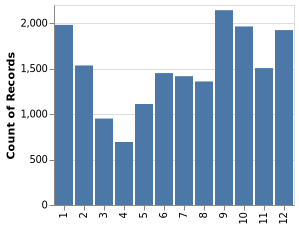

In [69]:
@vlplot(:bar,  x = df_2020.month, y = "count()")

In [30]:
df_2021 = @from i in df begin
    @where i.year == 2021
    @select {i.event_date, i.month, i.event_type, i.sub_event_type, i.location, i.fatalities}
    @collect DataFrame
end

16890×6 DataFrame
   Row │ event_date        month  event_type                  sub_event_type   ⋯
       │ String31          Any    String31                    String           ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ 31 December 2021  12     Protests                    Peaceful protest ⋯
     2 │ 31 December 2021  12     Riots                       Mob violence
     3 │ 31 December 2021  12     Riots                       Mob violence
     4 │ 31 December 2021  12     Protests                    Peaceful protest
     5 │ 31 December 2021  12     Protests                    Peaceful protest ⋯
     6 │ 31 December 2021  12     Protests                    Peaceful protest
     7 │ 31 December 2021  12     Protests                    Peaceful protest
     8 │ 31 December 2021  12     Protests                    Peaceful protest
     9 │ 31 December 2021  12     Protests                    Peaceful protest ⋯
    10 │ 31 December 2021  12     Protests                    Peaceful protest
    11 │ 31 December 2021  12     Violence against civilians  Attack
   ⋮   │        ⋮            ⋮                ⋮                         ⋮      ⋱
 16881 │ 01 January 2021   1      Protests                    Peaceful protest
 16882 │ 01 January 2021   1      Protests                    Peaceful protest ⋯
 16883 │ 01 January 2021   1      Protests                    Peaceful protest
 16884 │ 01 January 2021   1      Protests                    Peaceful protest
 16885 │ 01 January 2021   1      Protests                    Peaceful protest
 16886 │ 01 January 2021   1      Protests                    Peaceful protest ⋯
 16887 │ 01 January 2021   1      Protests                    Peaceful protest
 16888 │ 01 January 2021   1      Protests                    Peaceful protest
 16889 │ 01 January 2021   1      Protests                    Peaceful protest
 16890 │ 01 January 2021   1      Violence against civilians  Attack           ⋯
                                                3 columns and 16869 rows omitted

In [31]:
df_2022 = @from i in df begin
    @where i.year == 2022
    @select {i.event_date, i.month, i.event_type, i.sub_event_type, i.location, i.fatalities}
    @collect DataFrame
end

3201×6 DataFrame
  Row │ event_date       month  event_type                  sub_event_type     ⋯
      │ String31         Any    String31                    String             ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 18 March 2022    3      Riots                       Mob violence       ⋯
    2 │ 18 March 2022    3      Protests                    Peaceful protest
    3 │ 18 March 2022    3      Protests                    Peaceful protest
    4 │ 18 March 2022    3      Protests                    Peaceful protest
    5 │ 18 March 2022    3      Riots                       Mob violence       ⋯
    6 │ 18 March 2022    3      Riots                       Mob violence
    7 │ 18 March 2022    3      Protests                    Peaceful protest
    8 │ 18 March 2022    3      Protests                    Peaceful protest
    9 │ 18 March 2022    3      Protests                    Peaceful protest   ⋯
   10 │ 18 March 2022    3      Protests                    Peaceful protest
   11 │ 18 March 2022    3      Protests                    Peaceful protest
  ⋮   │        ⋮           ⋮                ⋮                         ⋮        ⋱
 3192 │ 01 January 2022  1      Protests                    Peaceful protest
 3193 │ 01 January 2022  1      Protests                    Peaceful protest   ⋯
 3194 │ 01 January 2022  1      Protests                    Peaceful protest
 3195 │ 01 January 2022  1      Protests                    Peaceful protest
 3196 │ 01 January 2022  1      Strategic developments      Agreement
 3197 │ 01 January 2022  1      Violence against civilians  Attack             ⋯
 3198 │ 01 January 2022  1      Riots                       Mob violence
 3199 │ 01 January 2022  1      Protests                    Peaceful protest
 3200 │ 01 January 2022  1      Protests                    Peaceful protest
 3201 │ 01 January 2022  1      Protests                    Peaceful protest   ⋯
                                                 3 columns and 3180 rows omitted